In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
os.sys.path.append('/home/ashesh.ashesh/code/denoiSplit')
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="2"


In [3]:
# there are two environments(debug and prod). From where you want to fetch the code and data? 
DEBUG=False

In [4]:
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


/localscratch/miniforge3/envs/usplit_vdi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.11 (you have 1.4.7). Upgrade using: pip install --upgrade albumentations


In [5]:
# 'stats_'+'_'.join(ckpt_dir.split('/')[-4:]) + '.pkl'

In [6]:
ckpt_dir = "/group/jug/ashesh/training_pre_eccv/disentangle/2403/D23-M3-S0-L0/10"
# gnode01/2403/D23-M3-S0-L0/29"
# save the results also for the following ckpt_dirs
# '/home/ashesh.ashesh/training/disentangle/2403/D23-M3-S0-L0/0', =>  /group/jug/ashesh/data/paper_stats/Test_PNone_G32_M10_Sk0/pred_disentangle_2403_D23-M3-S0-L0_0.tif
# '/home/ashesh.ashesh/training/disentangle/2403/D23-M3-S0-L0/15', => Written (5, 960, 960, 2) to /group/jug/ashesh/data/paper_stats/Test_PNone_G32_M10_Sk0/pred_disentangle_2403_D23-M3-S0-L0_15.tif
# '/home/ashesh.ashesh/training/disentangle/2403/D23-M3-S0-L0/22', => Written (5, 960, 960, 2) to /group/jug/ashesh/data/paper_stats/Test_PNone_G32_M10_Sk0/pred_disentangle_2403_D23-M3-S0-L0_22.tif
# '/home/ashesh.ashesh/training/disentangle/2403/D23-M3-S0-L0/0',
# '/home/ashesh.ashesh/training/disentangle/2402/D23-M3-S0-L0/59', => Written (5, 960, 960, 2) to /group/jug/ashesh/data/paper_stats/Test_PNone_G32_M10_Sk0/pred_disentangle_2402_D23-M3-S0-L0_59.tif
# '/home/ashesh.ashesh/training/disentangle/2402/D23-M3-S0-L0/60', => Written (5, 960, 960, 2) to /group/jug/ashesh/data/paper_stats/Test_PNone_G32_M10_Sk0/pred_disentangle_2402_D23-M3-S0-L0_60.tif
# '/home/ashesh.ashesh/training/disentangle/2402/D23-M3-S0-L0/67', => Written (5, 960, 960, 2) to /group/jug/ashesh/data/paper_stats/Test_PNone_G32_M10_Sk0/pred_disentangle_2402_D23-M3-S0-L0_67.tif

assert os.path.exists(ckpt_dir)
# 211/D3-M3-S0-L0/0
# 2210/D3-M3-S0-L0/128
# 2210/D3-M3-S0-L0/129

In [7]:
# !ls /home/ubuntu/ashesh/training/disentangle/2209/D3-M9-S0-L0/1

In [8]:
def get_dtype(ckpt_fpath):
    if os.path.isdir(ckpt_fpath):
        ckpt_fpath = ckpt_fpath[:-1] if ckpt_fpath[-1] == '/' else ckpt_fpath
    elif os.path.isfile(ckpt_fpath):
        ckpt_fpath = os.path.dirname(ckpt_fpath)
    assert ckpt_fpath[-1] != '/'
    return int(ckpt_fpath.split('/')[-2].split('-')[0][1:])

In [9]:
dtype = get_dtype(ckpt_dir)

In [10]:
dtype

23

In [11]:
image_size_for_grid_centers = 64
mmse_count = 10
custom_image_size = None
data_t_list = None #[0]


batch_size = 8
num_workers = 4
COMPUTE_LOSS = False
use_deterministic_grid = None
threshold = None # 0.02
compute_kl_loss = False
evaluate_train = False# inspect training performance
eval_datasplit_type = DataSplitType.Test
val_repeat_factor = None
psnr_type = 'range_invariant' #'simple', 'range_invariant'

In [12]:
%run ./nb_core/config_loader.ipynb

data:
  ch1_fname: pred_disentangle_2403_D7-M23-S0-L0_18.tif
  ch2_fname: pred_disentangle_2403_D7-M23-S0-L0_16.tif
  ch_input_fname: pred_disentangle_2403_D7-M23-S0-L0_32.tif
  channel_1: 0
  channel_2: 2
  channelwise_quantile: false
  clip_percentile: 1
  data_type: 23
  deterministic_grid: false
  enable_gaussian_noise: false
  grid_size: 64
  image_size: 64
  input_is_sum: false
  multiscale_lowres_count: 5
  normalized_input: true
  num_channels: 3
  padding_mode: reflect
  padding_value: null
  poisson_noise_factor: -1
  randomized_channels: false
  sampler_type: 0
  target_separate_normalization: true
  threshold: 0.02
  train_aug_rotate: false
  use_one_mu_std: true
  val_grid_size: 64
datadir: /group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/
exptname: 2403/D23-M3-S0-L0/10
git:
  branch: noise_models
  changedFiles:
  - disentangle/notebooks/Denoiser.ipynb
  - disentangle/notebooks/Denoiser_Splitter.ipynb
  - disentangle/notebooks/EvalFineTuning.ipynb
  - disentangle/n

In [13]:
tokens = ckpt_dir.split('/')
idx = tokens.index('disentangle')
if config.model.model_type == 25 and tokens[idx+1] == '2312':
    config.model.model_type = ModelType.LadderVAERestrictedReconstruction

In [14]:
from denoisplit.core.sampler_type import SamplerType
from denoisplit.core.loss_type import LossType
from denoisplit.data_loader.ht_iba1_ki67_rawdata_loader import SubDsetType
# from denoisplit.core.lowres_merge_type import LowresMergeType


with config.unlocked():
    config.model.skip_nboundary_pixels_from_loss = None
    if config.model.model_type == ModelType.UNet and 'n_levels' not in config.model:
        config.model.n_levels = 4
    if config.data.sampler_type == SamplerType.NeighborSampler:
        config.data.sampler_type = SamplerType.DefaultSampler
        config.loss.loss_type = LossType.Elbo
        config.data.grid_size = config.data.image_size
    if 'ch1_fpath_list' in config.data:
        config.data.ch1_fpath_list = config.data.ch1_fpath_list[:1]
        config.data.mix_fpath_list = config.data.mix_fpath_list[:1]
    if config.data.data_type == DataType.Pavia2VanillaSplitting:
        if 'channel_2_downscale_factor' not in config.data:
            config.data.channel_2_downscale_factor = 1
    if config.model.model_type == ModelType.UNet and 'init_channel_count' not in config.model:
        config.model.init_channel_count = 64
    
    if 'skip_receptive_field_loss_tokens' not in config.loss:
        config.loss.skip_receptive_field_loss_tokens = []
    
    if dtype == DataType.HTIba1Ki67:
        config.data.subdset_type = SubDsetType.Iba1Ki64
        config.data.empty_patch_replacement_enabled = False
    
    if 'lowres_merge_type' not in config.model.encoder:
        config.model.encoder.lowres_merge_type = 0
    if 'validtarget_random_fraction' in config.data:
        config.data.validtarget_random_fraction = None
    
    if config.data.data_type == DataType.TwoDset:
        config.model.model_type = ModelType.LadderVae
        for key in config.data.dset1:
            config.data[key] = config.data.dset1[key]
    if 'dump_kth_frame_prediction' in config.training:
        config.training.dump_kth_frame_prediction = None

    if 'input_is_sum' not in config.data:
        config.data.input_is_sum = False

In [15]:
# config.data.channel_1 = 0 
# config.data.channel_2 = 3

In [16]:
dtype = config.data.data_type

if DEBUG:
    if dtype == DataType.CustomSinosoid:
        data_dir = f'{DATA_ROOT}/sinosoid/'
    elif dtype == DataType.OptiMEM100_014:
        data_dir = f'{DATA_ROOT}/microscopy/'
else:
    if dtype in [DataType.CustomSinosoid, DataType.CustomSinosoidThreeCurve]:
        data_dir = f'{DATA_ROOT}/sinosoid_without_test/sinosoid/'
    elif dtype == DataType.OptiMEM100_014:
        data_dir = f'{DATA_ROOT}/microscopy/'
    elif dtype == DataType.Prevedel_EMBL:
        data_dir = f'{DATA_ROOT}/Prevedel_EMBL/PKG_3P_dualcolor_stacks/NoAverage_NoRegistration/'
    elif dtype == DataType.AllenCellMito:
        data_dir = f'{DATA_ROOT}/allencell/2017_03_08_Struct_First_Pass_Seg/AICS-11/'
    elif dtype == DataType.SeparateTiffData:
        data_dir = f'{DATA_ROOT}/ventura_gigascience'
    elif dtype == DataType.SemiSupBloodVesselsEMBL:
        data_dir = f'{DATA_ROOT}/EMBL_halfsupervised/Demixing_3P'
    elif dtype == DataType.Pavia2VanillaSplitting:
        data_dir = f'{DATA_ROOT}/pavia2'
    elif dtype == DataType.ExpansionMicroscopyMitoTub:
        data_dir = f'{DATA_ROOT}/expansion_microscopy_Nick/'
    elif dtype == DataType.ShroffMitoEr:
        data_dir = f'{DATA_ROOT}/shrofflab/'
    elif dtype == DataType.HTIba1Ki67:
        data_dir = f'{DATA_ROOT}/Stefania/20230327_Ki67_and_Iba1_trainingdata/'
    elif dtype == DataType.BioSR_MRC:
        data_dir = f'{DATA_ROOT}/BioSR/'
    elif dtype == DataType.ExpMicroscopyV2:
        data_dir = f'{DATA_ROOT}/expansion_microscopy_v2/'
    elif dtype == DataType.TavernaSox2GolgiV2:
        data_dir = f'{DATA_ROOT}/TavernaSox2Golgi/acquisition2/'
    elif dtype == DataType.PredictedTiffData:
        # data_dir = '/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk44/'
        # data_dir = '/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk32'
        data_dir = '/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0'
        

In [17]:
%run ./nb_core/disentangle_setup.ipynb


Loading from /group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0 Channels: /group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/pred_disentangle_2403_D7-M23-S0-L0_18.tif,/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/pred_disentangle_2403_D7-M23-S0-L0_16.tif, inp:/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/pred_disentangle_2403_D7-M23-S0-L0_32.tif Mode:Train
[LCMultiChExplicitInputDloader] Sz:64 Train:1 N:80 NumPatchPerN:1024 NormInp:True SingleNorm:True Rot:False RandCrop:True Q:1 SummedInput:False ReplaceWithRandSample:False BckQ:0.0 Pad:{'mode': 'reflect'}
Loading from /group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0 Channels: /group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/pred_disentangle_2403_D7-M23-S0-L0_18.tif,/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/pred_disentangle_2403_D7-M23-S0-L0_16.tif, inp:/group/jug/ashesh/data/paper_stats/All_P128_G64_M50_Sk0/pred_disentangle_2403_D7-M23-S0-L0_32.tif Mode:Test
[LCMultiChExplici

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpld2qzzwi
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpld2qzzwi/_remote_module_non_scriptable.py


[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:1 McParallelBeam:1 McFactor2
[3, 3] [1, 1]
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:1 McParallelBeam:1 McFactor4
[3, 3] [1, 1]
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:1 McParallelBeam:1 McFactor8
[3, 3] [1, 1]
[3, 3] [1, 1]
[BottomUpLayer] McEnabled:1 McParallelBeam:1 McFactor16
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[TopDownLayer] normalize_latent_factor:1.0
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[TopDownLayer] normalize_latent_factor:1.0
[3, 3] [1, 1]
[3, 3] [1, 1]
[3, 3] [1, 1]
[TopDownLayer] normalize_latent_factor:1.0
[3, 3] [1, 1]
[TopDownLayer] normalize_latent_factor:1.0
[3, 3] [1, 1]
[GaussianLikelihood] PredLVar:pixelwise LowBLVar:-5
[LadderVAE] Stoc:True RecMode:False TethInput:False
Loading checkpoint from /group/jug/ashesh/training_pre_eccv/disentangle/2403/D23-M3-S0-L0/10/BaselineVAECL_best.ckpt
Loading from epoch 22
Model has 4.702M parameters


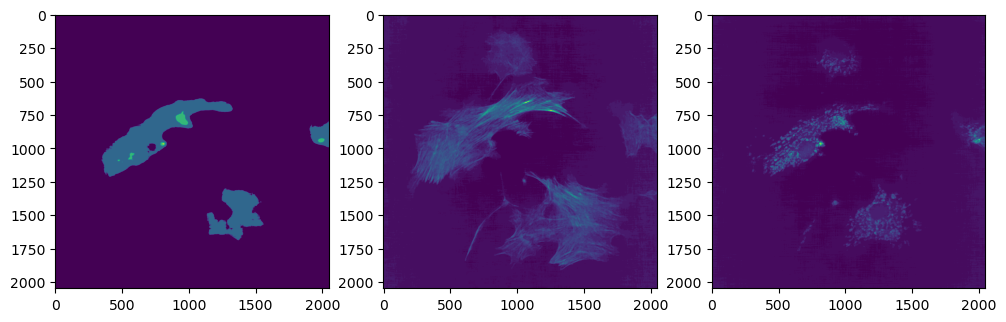

In [18]:
_,ax = plt.subplots(figsize=(12,4),ncols=3)
ax[0].imshow(val_dset._data[0,...,0])
ax[1].imshow(val_dset._data[0,...,1])
ax[2].imshow(val_dset._data[0,...,2])

In [19]:
if image_size_for_grid_centers is not None:
    assert image_size_for_grid_centers == val_dset._grid_sz

In [20]:
if config.data.multiscale_lowres_count is not None and custom_image_size is not None:
    model.reset_for_different_output_size(custom_image_size)

In [21]:
# if config.model.model_type not in [ModelType.UNet, ModelType.BraveNet]:
#     with torch.no_grad():
#         inp, tar = val_dset[0][:2]
#         out, td_data = model(torch.Tensor(inp[None]).cuda())
#         print(td_data['z'][-1].shape)
#         print(out.shape)

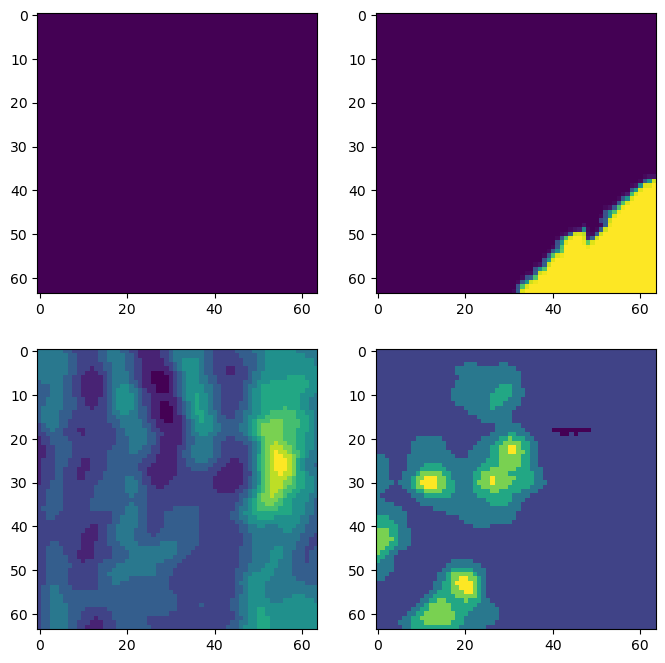

In [22]:
idx = np.random.randint(len(val_dset))
inp_tmp, tar_tmp, *_ = val_dset[idx]
ncols = len(tar_tmp)
nrows = 2
_,ax = plt.subplots(figsize=(4*ncols,4*nrows),ncols=ncols,nrows=nrows)
for i in range(min(ncols,len(inp_tmp))):
    ax[0,i].imshow(inp_tmp[i])

for channel_id in range(ncols):
    ax[1,channel_id].imshow(tar_tmp[channel_id])

In [23]:
if data_t_list is not None:
    val_dset.reduce_data(t_list=data_t_list)

In [24]:
from denoisplit.analysis.stitch_prediction import stitch_predictions
from denoisplit.analysis.mmse_prediction import get_dset_predictions
# from denoisplit.analysis.stitch_prediction import get_predictions as get_dset_predictions

pred_tiled, rec_loss, logvar_tiled, patch_psnr_tuple, pred_std_tiled = get_dset_predictions(model, 
                                                                                            val_dset,
                                                                                            batch_size,
                                               num_workers=num_workers,
                                               mmse_count=mmse_count,
                                                model_type = config.model.model_type)
tmp = np.round([x.item() for x in patch_psnr_tuple],2)
print('Patch wise PSNR, as computed during training', tmp,np.mean(tmp))

100%|██████████| 1280/1280 [12:28<00:00,  1.71it/s]

Patch wise PSNR, as computed during training [33.3  38.87] 36.084999999999994


In [25]:
idx_list = np.where(logvar_tiled.squeeze() < -6)[0]
if len(idx_list) > 0:
    plt.imshow(val_dset[idx_list[0]][1][1])

In [26]:
len(val_dset)

10240

<Axes: ylabel='Count'>

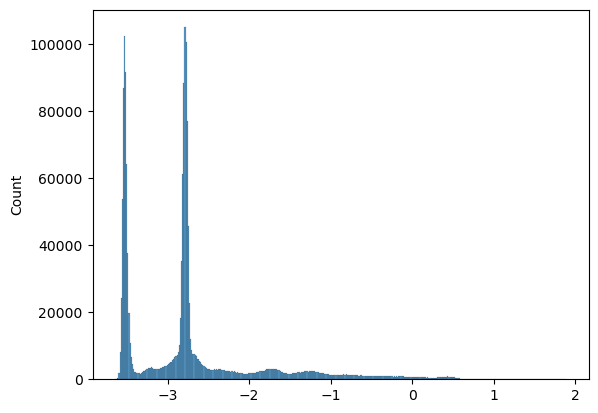

In [27]:
import seaborn as sns
sns.histplot(logvar_tiled[::50].squeeze().reshape(-1,))

In [28]:
print(np.quantile(rec_loss, [0,0.01,0.5, 0.9,0.99,0.999,1]).round(2))

[-0.57 -0.47  0.24  1.07  2.    2.97  3.06]


In [29]:
pred_tiled.shape

(10240, 2, 64, 64)

In [30]:
logvar_tiled.shape

(10240, 2, 64, 64)

In [31]:
if pred_tiled.shape[-1] != val_dset.get_img_sz():
    pad = (val_dset.get_img_sz() - pred_tiled.shape[-1] )//2
    pred_tiled = np.pad(pred_tiled, ((0,0),(0,0),(pad,pad),(pad,pad)))

pred = stitch_predictions(pred_tiled,val_dset, smoothening_pixelcount=0)
if len(np.unique(logvar_tiled)) == 1:
    logvar = None
else:
    logvar = stitch_predictions(logvar_tiled,val_dset, smoothening_pixelcount=0)
pred_std = stitch_predictions(pred_std_tiled,val_dset, smoothening_pixelcount=0)

In [32]:
if pred.shape[-1] != pred_tiled.shape[1]:
    assert pred.shape[-1] == 1 + pred_tiled.shape[1]
    assert pred[...,-1].std() == 0
    pred = pred[...,:-1].copy()
    pred_std = pred_std[...,:-1].copy()
    if logvar is not None:
        logvar = logvar[...,:-1].copy()

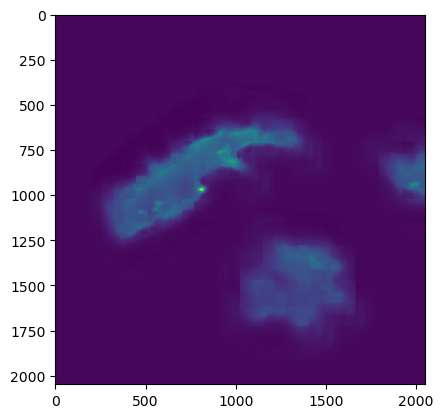

In [33]:
plt.imshow(pred[0,...,0])

In [34]:
pred_tiled.shape

(10240, 2, 64, 64)

In [35]:
def print_ignored_pixels():
    ignored_pixels = 1
    while(pred[0,-ignored_pixels:,-ignored_pixels:,].std() ==0):
        ignored_pixels+=1
    ignored_pixels-=1
    print(f'In {pred.shape}, last {ignored_pixels} many rows and columns are all zero.')
    return ignored_pixels

actual_ignored_pixels = print_ignored_pixels()

In (10, 2048, 2048, 2), last 0 many rows and columns are all zero.


## Ignore the pixels which are present in the last few rows and columns. 
1. They don't come in the batches. So, in prediction, they are simply zeros. So they are being are ignored right now. 
2. For the border pixels which are on the top and the left, overlapping yields worse performance. This is becuase, there is nothing to overlap on one side. So, they are essentially zero padded. This makes the performance worse. 

In [36]:
actual_ignored_pixels

0

In [37]:
if config.data.data_type in [DataType.OptiMEM100_014,
                                                      DataType.SemiSupBloodVesselsEMBL, 
                                                      DataType.Pavia2VanillaSplitting,
                                                      DataType.ExpansionMicroscopyMitoTub,
                                                      DataType.ShroffMitoEr,
                                                      DataType.HTIba1Ki67]:
    ignored_last_pixels = 32 
elif config.data.data_type == DataType.BioSR_MRC:
    ignored_last_pixels = 44
    # assert val_dset.get_img_sz() == 64
    # ignored_last_pixels = 108
else:
    ignored_last_pixels = 0

ignore_first_pixels = 0
# ignored_last_pixels = 160
assert actual_ignored_pixels <= ignored_last_pixels, f'Set ignored_last_pixels={actual_ignored_pixels}'
print(ignored_last_pixels)

0


In [38]:
# NOTE: This is different from the normal setup. here , we have an input channel and therefore we are ignoring it.
tar = val_dset._data[...,1:]

def ignore_pixels(arr):
    if ignore_first_pixels:
        arr = arr[:,ignore_first_pixels:,ignore_first_pixels:]
    if ignored_last_pixels:
        arr = arr[:,:-ignored_last_pixels,:-ignored_last_pixels]
    return arr

pred = ignore_pixels(pred)
tar = ignore_pixels(tar)
if pred_std is not None:
    pred_std = ignore_pixels(pred_std)


In [39]:
from skimage.metrics import structural_similarity

def _avg_psnr(target, prediction, psnr_fn):
    output = np.mean([psnr_fn(target[i:i + 1], prediction[i:i + 1]).item() for i in range(len(prediction))])
    return round(output, 2)


def avg_range_inv_psnr(target, prediction):
    return _avg_psnr(target, prediction, RangeInvariantPsnr)


def avg_psnr(target, prediction):
    return _avg_psnr(target, prediction, PSNR)


def compute_masked_psnr(mask, tar1, tar2, pred1, pred2):
    mask = mask.astype(bool)
    mask = mask[..., 0]
    tmp_tar1 = tar1[mask].reshape((len(tar1), -1, 1))
    tmp_pred1 = pred1[mask].reshape((len(tar1), -1, 1))
    tmp_tar2 = tar2[mask].reshape((len(tar2), -1, 1))
    tmp_pred2 = pred2[mask].reshape((len(tar2), -1, 1))
    psnr1 = avg_range_inv_psnr(tmp_tar1, tmp_pred1)
    psnr2 = avg_range_inv_psnr(tmp_tar2, tmp_pred2)
    return psnr1, psnr2

def avg_ssim(target, prediction):
    ssim = [structural_similarity(target[i],prediction[i], data_range=(target[i].max() - target[i].min())) for i in range(len(target))]
    return np.mean(ssim),np.std(ssim)

In [40]:
model.data_std

{'input': tensor([[[[2.7656]]]], device='cuda:0'),
 'target': tensor([[[[3.7482]],
 
          [[2.3920]]]], device='cuda:0')}

In [41]:
sep_mean, sep_std = model.data_mean, model.data_std
if isinstance(sep_mean, dict):
    sep_mean = sep_mean['target']
    sep_std = sep_std['target']

if isinstance(sep_mean, int):
    pass
else:
    sep_mean = sep_mean.squeeze()[None,None,None]
    sep_std = sep_std.squeeze()[None,None,None]
    sep_mean = sep_mean.cpu().numpy() 
    sep_std = sep_std.cpu().numpy()

tar_normalized = (tar - sep_mean)/ sep_std

In [42]:
# from denoisplit.metrics.calibration import Calibration

# calib = Calibration(num_bins=30, mode='pixelwise')
# # stats = calib.compute_stats(pred, logvar, tar_normalized)
# stats = calib.compute_stats(pred, pred_std, tar_normalized)

In [43]:
# count = np.array(stats[0]['bin_count'])
# count = count / count.sum()
# count.cumsum()[:-1]

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# _,ax = plt.subplots(figsize=(15,5),ncols=3,nrows=1)
# idx = -1
# highend = stats[0]['bin_matrix'][idx] > 20
# sns.heatmap(highend, cmap='hot', ax=ax[0])
# sns.heatmap(stats[1]['bin_matrix'][idx], cmap='hot', ax=ax[1])
# sns.heatmap(tar[idx,...,0]+tar[idx,...,1], cmap='hot',ax=ax[2])
# # plt.imshow(stats[0]['bin_matrix'][0], cmap='hot')

In [45]:
# plt.plot(stats[0]['rmv'][1:-1], stats[0]['rmse'][1:-1], 'o')

In [46]:
# from denoisplit.metrics.calibration import get_calibrated_factor_for_stdev
# calibration_factor_std = get_calibrated_factor_for_stdev(pred, np.log(pred_std**2), tar_normalized, batch_size=8, lr=0.1)

In [47]:
# calib = Calibration(num_bins=30, mode='pixelwise')
# stats = calib.compute_stats(pred, pred_std, tar_normalized)

# calib = Calibration(num_bins=30, mode='pixelwise')
# calib_stats = calib.compute_stats(pred, pred_std * calibration_factor_std, tar_normalized)

In [48]:
# plt.plot(np.log(stats[0]['rmv'][1:-16]), stats[0]['rmse'][1:-16], 'o-', color='g', label='Uncalibrated')
# plt.plot(np.log(calib_stats[0]['rmv'][1:-16]), calib_stats[0]['rmse'][1:-16], 'o-', color='r', label='Calibrated')

# xmin = np.log(stats[0]['rmv'][1:-16]).min()
# xmax = np.log(stats[0]['rmv'][1:-16]).max()
# ymin = min(np.min(stats[0]['rmse'][1:-16]), np.min(calib_stats[0]['rmse'][1:-16]))
# ymax = max(np.max(stats[0]['rmse'][1:-16]), np.max(calib_stats[0]['rmse'][1:-16]))
# min_val = min(xmin, ymin)
# max_val = max(xmax, ymax)
# # plt.xlim([0, max_val])
# # plt.ylim([0, max_val])
# plt.legend()
# plt.xlabel('RMV')
# plt.ylabel('RMSE')

In [49]:
q_vals = [0.01, 0.1,0.5,0.9,0.95, 0.99,1]
for i in range(tar_normalized.shape[-1]):
    print(f'Channel {i}:', np.quantile(tar_normalized[...,i], q_vals).round(2))

Channel 0: [-0.59 -0.59 -0.32  0.74  1.28  2.88 18.89]
Channel 1: [-0.55 -0.55 -0.13  0.29  1.12  3.63 50.46]


In [50]:
# _,ax = plt.subplots(figsize=(6,6))
# for i in range(tar.shape[-1]):
#     sns.histplot(tar[:,::10,::10,i].reshape(-1,), color='g', label=f'{i}', kde=True)

# plt.legend()

In [51]:
# from denoisplit.data_loader.schroff_rawdata_loader import mito_channel_fnames
# from denoisplit.core.tiff_reader import load_tiff
# import seaborn as sns

# fpaths = [os.path.join(datapath, x) for x in mito_channel_fnames()]
# fpath = fpaths[0]
# print(fpath)
# img = load_tiff(fpaths[0])
# temp = img.copy()
# sns.histplot(temp[:,:,::10,::10].reshape(-1,))
# plt.hist(temp[:,:,::10,::10].reshape(-1,),bins=100)

2


/home/ashesh.ashesh/code/denoiSplit/denoisplit/analysis/plot_error_utils.py:52: UserWarning: Overwriting the cmap 'shiftedcmap' that was already in the registry.
  matplotlib.colormaps.register(cmap=newcmap, force=True)


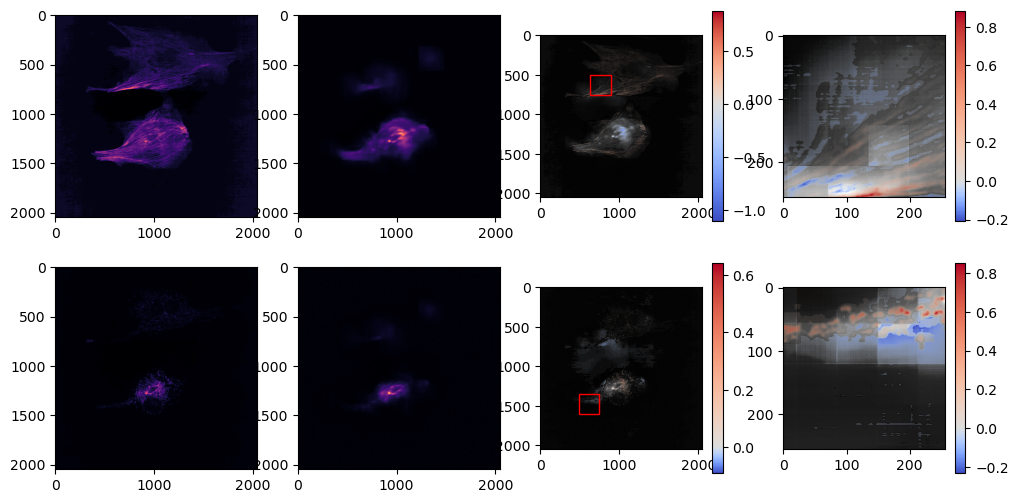

In [52]:
import matplotlib.patches as patches
import matplotlib
from denoisplit.analysis.plot_error_utils import plot_error
nrows = pred.shape[-1]
img_sz = 3
_,ax = plt.subplots(figsize=(4*img_sz,nrows*img_sz),ncols=4,nrows=nrows)
idx = np.random.randint(len(pred))
print(idx)
for ch_id in range(nrows):
  ax[ch_id,0].imshow(tar_normalized[idx,..., ch_id], cmap='magma')
  ax[ch_id,1].imshow(pred[idx,:,:,ch_id], cmap='magma')
  plot_error(tar_normalized[idx,...,ch_id], 
            pred[idx,:,:,ch_id], 
            cmap = matplotlib.cm.coolwarm, 
            ax = ax[ch_id,2], max_val = None)

  cropsz = 256
  h_s = np.random.randint(0, tar_normalized.shape[1] - cropsz)
  h_e = h_s + cropsz
  w_s = np.random.randint(0, tar_normalized.shape[2] - cropsz)
  w_e = w_s + cropsz

  plot_error(tar_normalized[idx,h_s:h_e,w_s:w_e, ch_id], 
            pred[idx,h_s:h_e,w_s:w_e,ch_id], 
            cmap = matplotlib.cm.coolwarm, 
            ax = ax[ch_id,3], max_val = None)

  # Add rectangle to the region
  rect = patches.Rectangle((w_s, h_s), w_e-w_s, h_e-h_s, linewidth=1, edgecolor='r', facecolor='none')
  ax[ch_id,2].add_patch(rect)


In [53]:
pred_tiled.shape

(10240, 2, 64, 64)

### Take care of the shift which was introduced before saving the prediction to files.

In [54]:
import json
def get_offset(fname):
    json_fpath = os.path.join(data_dir, fname).replace('.tif','.json')
    if os.path.exists(json_fpath):
        with open(json_fpath, 'r') as f:
            data = json.load(f)
        return float(data['offset'])
    else:
        return 0

# ch1_pred_unnorm = pred[...,0]*sep_std[...,0].cpu().numpy() + sep_mean[...,0].cpu().numpy()
# ch2_pred_unnorm = pred[...,1]*sep_std[...,1].cpu().numpy() + sep_mean[...,1].cpu().numpy()
pred_unnorm = []
for i in range(pred.shape[-1]):
    if sep_std.shape[-1]==1:
        temp_pred_unnorm = pred[...,i]*sep_std[...,0] + sep_mean[...,0]
    else:
        temp_pred_unnorm = pred[...,i]*sep_std[...,i] + sep_mean[...,i]
    pred_unnorm.append(temp_pred_unnorm)

pred_unnorm[0] = pred_unnorm[0] + get_offset(config.data.ch1_fname)
pred_unnorm[1] = pred_unnorm[1] + get_offset(config.data.ch2_fname)
pred = np.stack(pred_unnorm, axis=-1)
pred = (pred - sep_mean)/sep_std

In [55]:
from denoisplit.scripts.evaluate import * 
from denoisplit.analysis.denoiser_splitter_utils import whether_to_flip
from denoisplit.config_utils import get_configdir_from_saved_predictionfile
import ml_collections

denoiser_configdir = get_configdir_from_saved_predictionfile(config.data.ch1_fname)
denoiser_config = load_config(denoiser_configdir)
denoiser_config = ml_collections.ConfigDict(denoiser_config)
if denoiser_config.data.data_type == DataType.BioSR_MRC:
    denoiser_input_dir = '/group/jug/ashesh/data/BioSR/'
elif denoiser_config.data.data_type == DataType.OptiMEM100_014:
    denoiser_input_dir = '/group/jug/ashesh/data/microscopy/OptiMEM100x014.tif'
elif denoiser_config.data.data_type == DataType.SeparateTiffData:
    denoiser_input_dir = '/group/jug/ashesh/data/ventura_gigascience/'
    denoiser_config.data.ch1_fname = denoiser_config.data.ch1_fname.replace('lowsnr', 'highsnr')
    denoiser_config.data.ch2_fname = denoiser_config.data.ch2_fname.replace('lowsnr', 'highsnr')
with denoiser_config.unlocked():
    highres_data = get_data_without_synthetic_noise(denoiser_input_dir, denoiser_config, eval_datasplit_type)

h, w = pred.shape[1:3]
highres_data = highres_data[:, :h, :w].copy()
if 'ch1_fname' in config.data and 'ch1_fname' in denoiser_config.data and denoiser_config.data.data_type != DataType.SeparateTiffData:
    if whether_to_flip(config.data.ch1_fname, config.data.ch2_fname, denoiser_config):
        highres_data = np.flip(highres_data, axis=-1)

Loading from /group/jug/ashesh/data/ventura_gigascience/ Channels: /group/jug/ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif,/group/jug/ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif, inp: Mode:Train
Loading from /group/jug/ashesh/data/ventura_gigascience/ Channels: /group/jug/ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif,/group/jug/ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif, inp: Mode:Test


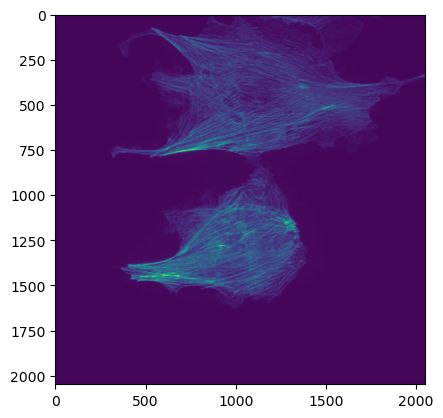

In [56]:
plt.imshow(highres_data[2,...,0])

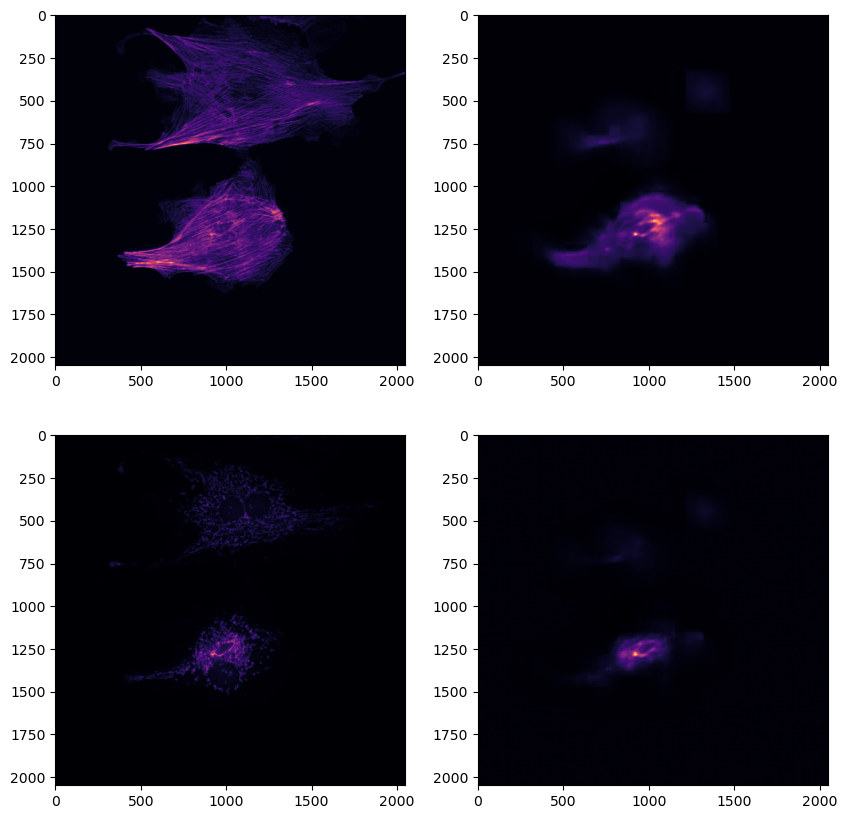

In [57]:
tmp_idx = 2
_,ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
ax[0,0].imshow(highres_data[tmp_idx,...,0], cmap='magma')
ax[0,1].imshow(pred[tmp_idx,...,0], cmap='magma')
ax[1,0].imshow(highres_data[tmp_idx,...,1], cmap='magma')
ax[1,1].imshow(pred[tmp_idx,...,1], cmap='magma')

In [58]:
from denoisplit.scripts.evaluate import compute_multiscale_ssim
if highres_data is not None:
    print(f'{DataSplitType.name(eval_datasplit_type)}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}')
    psnr1 = avg_range_inv_psnr(highres_data[...,0], pred_unnorm[0])
    psnr2 = avg_range_inv_psnr(highres_data[...,1], pred_unnorm[1])

    # ssim1_hres_mean, ssim1_hres_std = avg_ssim(highres_data[...,0], pred_unnorm[0])
    # ssim2_hres_mean, ssim2_hres_std = avg_ssim(highres_data[...,1], pred_unnorm[1])
    tar_tmp = (highres_data - sep_mean) /sep_std
    ssim1, ssim2 = compute_multiscale_ssim(tar_tmp, pred)
    print('PSNR on Highres', psnr1, psnr2)
    print('SSIM on Highres', np.round(ssim1,3), np.round(ssim2,3))


Test_PNone_G64_M10_Sk0
PSNR on Highres 25.96 30.25
SSIM on Highres 0.711 0.808


In [59]:
from denoisplit.metrics.CARE_normalization import normalize_CARE, normalize_minmse
CARE_gt = []
CARE_pred = []
for ch_idx in range(highres_data.shape[-1]):
    CARE_gt_ch = [normalize_CARE(highres_data[i,...,ch_idx]) for i in range(len(highres_data))]
    CARE_pred_ch = [normalize_minmse(pred[i,...,ch_idx], CARE_gt_ch[i]) for i in range(len(pred))]
    CARE_gt_ch = np.stack(CARE_gt_ch)
    CARE_pred_ch = np.stack(CARE_pred_ch)
    CARE_gt.append(CARE_gt_ch[...,None])
    CARE_pred.append(CARE_pred_ch[...,None])

CARE_gt = np.concatenate(CARE_gt, axis=-1)
CARE_pred = np.concatenate(CARE_pred, axis=-1)
CARE_stats_dict = compute_high_snr_stats(config, CARE_gt, CARE_pred, verbose=False)
print('CARE-MS-SSIM on Highres', [np.round(ssim, 3) for ssim in CARE_stats_dict['ms_ssim']])


CARE-MS-SSIM on Highres [0.857, 0.916]


In [60]:
break here

SyntaxError: invalid syntax (760050616.py, line 1)

In [ ]:
handler = PaperResultsHandler('/group/jug/ashesh/data/paper_stats/',
                                              eval_datasplit_type,
                                              custom_image_size,
                                              image_size_for_grid_centers,
                                              mmse_count,
                                              ignored_last_pixels)
save_data  = np.stack(pred_unnorm, axis=-1)
offset = save_data.min()
save_data -= offset
save_data = save_data.astype(np.uint32)
handler.dump_predictions(ckpt_dir, save_data, {'offset': str(offset)})


In [ ]:
break here.

In [ ]:
import seaborn as sns
_,ax = plt.subplots(figsize=(4,4))
sns.histplot(highres_data[...,1].reshape(-1,), color='g', label=f'Highres',bins=100 )
sns.histplot(pred[...,1].reshape(-1,), color='g', label=f'Lowres',bins=100 )

In [ ]:
eps = 0.1
if config.model.model_type == ModelType.DenoiserSplitter:
    ch_idx = 0
    def predict(inp):
        inp = model.denoise_one_channel(inp, model._denoiser_input)
        out = model(inp)[0]
        return model.likelihood.distr_params(out)['mean'].cpu().numpy()

    idx = np.random.randint(0, len(val_dset))
    inp_tmp, tar_tmp = val_dset[idx]
    h,w,t = val_dset.idx_manager.hwt_from_idx(idx)
    h -= val_dset.per_side_overlap_pixelcount()
    w -= val_dset.per_side_overlap_pixelcount()
    print(idx)
    inp_tmp = torch.Tensor(inp_tmp[None]).cuda()

    with torch.no_grad():
        clean_pred1 = predict(inp_tmp)
        clean_pred2 = predict(inp_tmp)
        clean_pred3 = predict(inp_tmp)
        pred_mmse_arr = []
        for _ in range(50):
            clean_pred4 = predict(inp_tmp)
            pred_mmse_arr.append(clean_pred4)
        pred_mmse = np.mean(pred_mmse_arr, axis=0, keepdims=False)

    _,ax = plt.subplots(ncols=6, figsize=(18,3))
    ax[0].imshow(inp_tmp[0,0].cpu().numpy() ,cmap='magma')
    ax[1].imshow(highres_data[t,h:h+256,w:w+256,ch_idx] , cmap='magma')
    ax[2].imshow(clean_pred1[0,ch_idx], cmap='magma')
    ax[3].imshow(clean_pred2[0,ch_idx], cmap='magma')
    ax[4].imshow(pred_mmse[0,ch_idx], cmap='magma')
    ax[5].imshow(np.std(pred_mmse_arr, axis=0, keepdims=False)[0,ch_idx]/(eps + np.abs(pred_mmse[0,ch_idx])), cmap='magma')
    unnorm_temp_pred = (pred_mmse* data_std + data_mean)
    minv = unnorm_temp_pred[0,ch_idx].min()
    maxv = unnorm_temp_pred[0,ch_idx].max()
    print(minv, maxv)

In [ ]:
rmse_arr = []
psnr_arr = []
rinv_psnr_arr = []
ssim_arr = []
for ch_id in range(pred.shape[-1]):
    rmse =np.sqrt(((pred[...,ch_id] - tar_normalized[...,ch_id])**2).reshape(len(pred),-1).mean(axis=1))
    rmse_arr.append(rmse)
    psnr = avg_psnr(tar_normalized[...,ch_id].copy(), pred[...,ch_id].copy()) 
    rinv_psnr = avg_range_inv_psnr(tar_normalized[...,ch_id].copy(), pred[...,ch_id].copy())
    ssim_mean, ssim_std = avg_ssim(tar[...,ch_id], pred_unnorm[ch_id])
    psnr_arr.append(psnr)
    rinv_psnr_arr.append(rinv_psnr)
    ssim_arr.append((ssim_mean,ssim_std))


In [ ]:
print(f'{DataSplitType.name(eval_datasplit_type)}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}')
print('Rec Loss',np.round(rec_loss.mean(),3) )
print('RMSE', '\t'.join([str(np.mean(x).round(3)) for x in rmse_arr]))
print('PSNR', '\t'.join([str(x) for x in psnr_arr]))
print('RangeInvPSNR','\t'.join([str(x) for x in rinv_psnr_arr]))
print('SSIM','\t'.join([f'{round(x,3)}±{round(y,4)}' for (x,y) in ssim_arr]))
print()

In [ ]:
def show_for_one(idx):
    print(f'Showing for {idx}')
    with torch.no_grad():
        val_dset.enable_noise()
        inp, tar = val_dset[idx]
        val_dset.disable_noise()
        _, highres_tar = val_dset[idx]
        val_dset.enable_noise()


        inp = torch.Tensor(inp[None])
        tar = torch.Tensor(tar[None])
        inp = inp.cuda()
        x_normalized = model.normalize_input(inp)
        tar = tar.cuda()
        tar_normalized = model.normalize_target(tar)

        recon_img_list = []
        for _ in range(20):
            if config.model.model_type == ModelType.UNet:
                recon_normalized = model(x_normalized)
                imgs = recon_normalized
            elif config.model.model_type == ModelType.LadderVaeSemiSupervised:
                out, td_data = model(x_normalized)
                rec_loss, imgs = model.get_reconstruction_loss(out,
                                                               x_normalized,
                                                               tar_normalized,
                                                               return_predicted_img=True)
            else:
                recon_normalized, td_data = model(x_normalized)
                rec_loss, imgs = model.get_reconstruction_loss(recon_normalized, x_normalized, 
                                                               tar_normalized,
                                                               return_predicted_img=True)
            recon_img_list.append(imgs.cpu().numpy()[0])

    recon_img_list = np.array(recon_img_list)
    print(recon_img_list.shape)
    num_channels = imgs.shape[1]
    img_sz = 4
    # _,ax = plt.subplots(figsize=((1+num_channels)*img_sz,img_sz),ncols=num_channels+1)
    # ax[0].imshow(inp[0,0].cpu().numpy(), cmap='magma')
    # for i in range(num_channels):
    #     ax[i+1].imshow(tar[0,i].cpu().numpy(), cmap='magma')

    nrows=num_channels
    img_sz = 3
    ncols = 6
    _,ax = plt.subplots(figsize=(img_sz * ncols,nrows*img_sz),ncols=ncols,nrows=nrows)
    # add the input
    ax[0,0].imshow(inp[0,0].cpu().numpy(), cmap='magma')
    # sns.kdeplot(highres_tar[0].reshape(-1,), color='r', label='Ch0', ax=ax[1,0])
    # sns.kdeplot(highres_tar[1].reshape(-1,), color='b', label='Ch1', ax=ax[1,0])
    # ax[1,0].legend()
    for i in range(1, ncols-2):
        for col_idx in range(imgs.shape[1]):
            ax[col_idx,i].imshow(recon_img_list[i-1][col_idx], cmap='magma')
    
    mmse_pred = np.mean(recon_img_list, axis=0)
    for col_idx in range(imgs.shape[1]):
        ax[col_idx,ncols-2].imshow(mmse_pred[col_idx], cmap='magma')
        ax[col_idx,ncols-1].imshow(highres_tar[col_idx], cmap='magma')

        clean_ax(ax[col_idx,ncols-2])
        clean_ax(ax[col_idx,ncols-1])

show_for_one(np.random.randint(len(val_dset)))

In [ ]:
inp, tar = val_dset[0]

In [ ]:
_, ax = plt.subplots()
sns.kdeplot(tar[0].reshape(-1,), color='r', label='0')
sns.kdeplot(tar[1].reshape(-1,), color='b', label='1', ax=ax)

In [ ]:
break here

## Creating tiff file

In [ ]:
rdate,rconfig,rid = ckpt_dir.split("/")[-3:]
fname_prefix = rdate + '-' + rconfig.replace('-','')[:-2] + '-' + rid
fname_prefix

In [ ]:
from skimage.io import imsave
import numpy as np
pred_unnorm = np.concatenate([ch1_pred_unnorm[...,None],
                              ch2_pred_unnorm[...,None]],
                              axis=-1)
for ch_idx in [0,1]:
    tif_fname = f'{fname_prefix}_P{custom_image_size}_G{image_size_for_grid_centers}_M{mmse_count}_Sk{ignored_last_pixels}_C{ch_idx}.tif'
    tif_fpath=os.path.join('paper_tifs',tif_fname)
    if config.data.data_type in [DataType.CustomSinosoid, DataType.CustomSinosoidThreeCurve]:
        output = np.concatenate([
                            pred_unnorm[None,:50,...,ch_idx],tar[None,:50,...,ch_idx],
        ],axis=0)
    else:
        output = np.concatenate([
                                pred_unnorm[:1,...,ch_idx],tar[:1,...,ch_idx],
        ],axis=0)
    imsave(tif_fpath,output,plugin='tifffile')
    print(tif_fpath)

In [ ]:
! ls -lhrt paper_tifs/2211-D8M3S0-*

In [ ]:
# !ls paper_tifs/2211-D3M3S0-0_P64_G*

In [ ]:
idx = np.random.randint(len(val_dset))
inp, tar = val_dset[idx]

In [ ]:
if len(inp) > 1:
    _,ax = plt.subplots(figsize=(10,2.5),ncols=4)
    ax[0].imshow(inp[0])
    ax[1].imshow(inp[1])
    ax[2].imshow(inp[2])
    ax[3].imshow(inp[3])

In [ ]:
tar_unnorm.shape

In [ ]:
# _,ax = plt.subplots(figsize=(10,10))
# tmp_data =tar_unnorm[idx,:,:,1]
# q = np.quantile(tmp_data,0.95)
# tmp_data[tmp_data >q] = q
# plt.imshow(tmp_data)

In [ ]:
pred_unnorm.min()

In [ ]:
idx =  np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,20),ncols=2,nrows=2)
ax[0,0].set_title('Channel 1',size=20)
ax[0,1].set_title('Channel 2',size=20)
ax[0,0].set_ylabel('Target',size=20)
ax[1,0].set_ylabel('Predictions',size=20)
ax[0,0].imshow(tar_unnorm[idx,:,:,0])
ax[0,1].imshow(tar_unnorm[idx,:,:,1])
ax[1,0].imshow(pred_unnorm[idx,:,:,0])
ax[1,1].imshow(pred_unnorm[idx,:,:,1])

In [ ]:
idx =  0#np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,30),ncols=2,nrows=3)
ax[0,0].set_title('Target',size=20)
ax[0,1].set_title('Prediction',size=20)
ax[0,0].set_ylabel('Mixed Input',size=20)
ax[1,0].set_ylabel('Channel 1',size=20)
ax[2,0].set_ylabel('Channel 2',size=20)
sz = 400
ax[0,0].imshow(np.mean(tar_unnorm[idx, 1000:1000+sz,400:400+sz], axis=2))
ax[0,1].imshow(np.mean(pred_unnorm[idx,1000:1000+sz,400:400+sz], axis=2))

ax[1,0].imshow(tar_unnorm[idx, 1000:1000+sz,400:400+sz,0],vmax=126,vmin=88)
ax[1,1].imshow(pred_unnorm[idx,1000:1000+sz,400:400+sz,0], vmax=126,vmin=88)

ax[2,0].imshow(tar_unnorm[idx, 1000:1000+sz,400:400+sz,1],vmax=126,vmin=78)
ax[2,1].imshow(pred_unnorm[idx,1000:1000+sz,400:400+sz,1],vmax=126,vmin=78)

In [ ]:
tar_unnorm[idx, 1000:1500,400:900,0].std()

In [ ]:
pred_unnorm[idx,1000:1500,400:900,0].std()

In [ ]:
idx =  np.random.randint(len(tar_unnorm))
print(idx)
_,ax = plt.subplots(figsize=(20,30),ncols=2,nrows=3)
ax[0,0].set_title('Target',size=20)
ax[0,1].set_title('Prediction',size=20)
ax[0,0].set_ylabel('Mixed Input',size=20)
ax[1,0].set_ylabel('Channel 1',size=20)
ax[2,0].set_ylabel('Channel 2',size=20)

ax[0,0].imshow(np.mean(tar_unnorm[idx, 1000:1500,400:900], axis=2))
ax[0,1].imshow(np.mean(pred_unnorm[idx,1000:1500,400:900], axis=2))

ax[1,0].imshow(tar_unnorm[idx, 1000:1500,400:900,0])
ax[1,1].imshow(pred_unnorm[idx,1000:1500,400:900,0])

ax[2,0].imshow(tar_unnorm[idx, 1000:1500,400:900,1])
ax[2,1].imshow(pred_unnorm[idx,1000:1500,400:900,1])

In [ ]:
break here

## Comparing PSNR with high res data. 

In [ ]:
from denoisplit.core.data_split_type import  get_datasplit_tuples

In [ ]:
if eval_datasplit_type == DataSplitType.Val:
    N = len(pred1)/config.training.val_fraction
elif eval_datasplit_type == DataSplitType.Test:
    N = len(pred1)/config.training.test_fraction
train_idx,val_idx,test_idx = get_datasplit_tuples(config.training.val_fraction,config.training.test_fraction,N,
                                          starting_train=False)

In [ ]:
from denoisplit.core.tiff_reader import load_tiff

In [ ]:
highres_actin = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif')[...,None]
highres_mito = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif')[...,None]

if eval_datasplit_type == DataSplitType.Val:
    highres_data = np.concatenate([highres_actin[val_idx[0]:val_idx[1]],
                                   highres_mito[val_idx[0]:val_idx[1]]],
                                  axis=-1).astype(np.float32)
elif eval_datasplit_type == DataSplitType.Test:
    highres_data = np.concatenate([highres_actin[test_idx[0]:test_idx[1]],
                                   highres_mito[test_idx[0]:test_idx[1]]],
                                  axis=-1).astype(np.float32)

In [ ]:
thresh = np.quantile(highres_data,config.data.clip_percentile)
highres_data[highres_data > thresh]=thresh
    

In [ ]:
_,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=2)
ax[0,0].imshow(tar_unnorm[5,...,0])
ax[0,1].imshow(highres_data[5,...,0])
ax[1,0].imshow(tar_unnorm[8,...,1])
ax[1,1].imshow(highres_data[8,...,1])


In [ ]:
print('PSNR with HighRes', avg_psnr(highres_data[...,0], pred1),avg_psnr(highres_data[...,1], pred2))
print('RangeInvPSNR with HighRes', avg_range_inv_psnr(highres_data[...,0], pred1), 
      avg_range_inv_psnr(highres_data[...,1], pred2))


In [ ]:
# RangeInvPSNR with HighRes 16.82 18.33


In [ ]:
tar_1_tmp.dtype

In [ ]:
from denoisplit.core.psnr import fix_range, zero_mean
def fix_range_with_highresdata(pred,tar):
    pred_1_tmp = torch.Tensor(pred.reshape(len(pred),-1))
    tar_1_tmp = torch.Tensor(tar.reshape(len(tar),-1))
    pred_1_tmp = zero_mean(pred_1_tmp)
    tar_1_tmp = zero_mean(tar_1_tmp)
#     import pdb;pdb.set_trace()
    tar_1_tmp = tar_1_tmp / torch.std(tar_1_tmp, dim=1, keepdim=True)
    
    pred_1_tmp = fix_range(tar_1_tmp,pred_1_tmp)
    pred_1_tmp = pred_1_tmp.reshape_as(torch.Tensor(pred))
    tar_1_tmp = tar_1_tmp.reshape_as(torch.Tensor(pred))
    return pred_1_tmp, tar_1_tmp

In [ ]:
pred1_tmp, tar1_tmp = fix_range_with_highresdata(pred1, highres_data[...,0])
pred2_tmp, tar2_tmp = fix_range_with_highresdata(pred2, highres_data[...,1])

In [ ]:
ssim1_mean, ssim1_std = avg_ssim(tar1_tmp.numpy(), pred1_tmp.numpy())
ssim2_mean, ssim2_std = avg_ssim(tar2_tmp.numpy(), pred2_tmp.numpy())
print(ssim1_mean, ssim2_mean)

In [ ]:
_,ax = plt.subplots(figsize=(8,4),ncols=2)
ax[0].imshow(pred_1_tmp[0])
ax[1].imshow(tar_1_tmp[0])


In [ ]:
break here.

## Inspecting the performance on grid boundaries.


In [ ]:
from denoisplit.analysis.stitch_prediction import stitched_prediction_mask


skip_boundary_pixel_count = 0
for sk_c in [1,16,32,48,56]:
    mask = stitched_prediction_mask(val_dset, 
                                (val_dset._img_sz,val_dset._img_sz), 
                                skip_boundary_pixel_count, 
                                sk_c)
    mask = ignore_pixels(mask)
    psnr1, psnr2 = compute_masked_psnr(mask, tar1,tar2,pred1,pred2)
    print(f'[Pad:{val_dset.per_side_overlap_pixelcount()}] SkipCentral', sk_c,
          psnr1,psnr2)

In [ ]:
plt.imshow(mask[0,:,:,0])

## Inspecting the performance on central regions

In [ ]:
skip_central_pixel_count = 0

for sk_b in [1,8,16,20,24]:
    mask = stitched_prediction_mask(val_dset, 
                                (val_dset._img_sz,val_dset._img_sz), 
                                sk_b, 
                                skip_central_pixel_count)
    mask = ignore_pixels(mask)
    psnr1, psnr2 = compute_masked_psnr(mask, tar1,tar2,pred1,pred2)
    print(f'[Pad:{val_dset.per_side_overlap_pixelcount()}] SkipBoundary', sk_b, psnr1,psnr2)

In [ ]:
plt.imshow(mask[0,:,:,0])

In [ ]:
# for w in range(2,202,25):
#     print(f'RangeInvPSNR but skipping {w}', avg_range_inv_psnr(np.copy(tar1[:,w:-w,w:-w]), 
#                                                                np.copy(pred1[:,w:-w,w:-w])),
    
#                                             avg_range_inv_psnr(np.copy(tar2[:,w:-w,w:-w]), 
#                                                                np.copy(pred2[:,w:-w,w:-w]).copy()))

In [ ]:
h = 1200
w = 1200
sz = 512
x = tar_unnorm[:1,h:h+sz,w:w+sz].mean(axis=3)

In [ ]:
p_count = 32
y1 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]))
y2 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]), constant_values=237)
y3 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]), mode='linear_ramp', end_values=237)
y4 = np.pad(x,np.array([[0, 0], [p_count, p_count], [p_count, p_count]]),mode='reflect')


In [ ]:
np.quantile(x, [0,0.05, 0.1])

In [ ]:
_,ax = plt.subplots(figsize=(16,4),ncols=4)
ax[0].imshow(y1[0], )
ax[1].imshow(y2[0], )
ax[2].imshow(y3[0], )
ax[3].imshow(y4[0], )

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(tar_unnorm[0,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(tar_unnorm[0,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(tar_unnorm[-1,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(tar_unnorm[-1,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=2)
sns.histplot(pred_unnorm[0,:,:,0].reshape(-1,),ax=ax[0])
sns.histplot(pred_unnorm[0,:,:,1].reshape(-1,),ax=ax[1])

In [ ]:
import matplotlib.ticker as ticker
# import seaborn.apionly as sns

_,ax = plt.subplots(figsize=(20,4))
sns.histplot(tar_unnorm[-1,:,:].mean(axis=2).reshape(-1,))
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

In [ ]:
tar_unnorm[-1,:,:].shape

In [ ]:
# inp, tar = val_dset[11060]

In [ ]:
# _,ax = plt.subplots(figsize=(16,4),ncols=4)
# ax[0].imshow(inp[0])
# ax[1].imshow(inp[1])
# ax[2].imshow(inp[2])
# ax[3].imshow(inp[3])

In [ ]:
# _,ax = plt.subplots(figsize=(8,4),ncols=2)
# ax[0].imshow(tar[0])
# ax[1].imshow(tar[1])

## Inspecting the difference in behaviour when different sized inputs are passed. 

In [ ]:
import seaborn as sns
def compute_centered_diff(big,small):
    pad = (big.shape[-1] - small.shape[-1])//2
#     import pdb;pdb.set_trace()
    return big[:,:,pad:-pad,pad:-pad] - small
 
old_img_sz = val_dset.get_img_sz()
val_dset.set_img_sz(128)
inp2, tar2 = val_dset[10000]
with torch.no_grad():
    bu_values2 = model.bottomup_pass(torch.Tensor(inp2[None]).cuda())

val_dset.set_img_sz(256)
inp3, tar3 = val_dset[10000]
with torch.no_grad():
    bu_values3 = model.bottomup_pass(torch.Tensor(inp3[None]).cuda())

diff = (bu_values2[0] - bu_values3[0][:,:,32:-32,32:-32]).cpu().numpy()
sns.histplot(diff.reshape(-1,))

##LOOKING AT bu_values
idx=1
diff = compute_centered_diff(bu_values3[idx],bu_values2[idx]).cpu().numpy()
_,ax =plt.subplots(figsize=(10,10))
sns.heatmap(diff[0,0])

## Looking at the difference in prediction.
with torch.no_grad():
    out2,_ = model(torch.Tensor(inp2[None,]).cuda())
    out3,_ = model(torch.Tensor(inp3[None,]).cuda())
    img2 = get_img_from_forward_output(out3,model)
    img3 = get_img_from_forward_output(out2,model)
diff = compute_centered_diff(img2,img3)
_,ax =plt.subplots(figsize=(10,10))
sns.heatmap(diff[0,1].cpu().numpy())
val_dset.set_img_sz(old_img_sz)


In [ ]:
from denoisplit.core.tiff_reader import load_tiff

In [ ]:
img = load_tiff('/home/ashesh.ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif')

In [ ]:
img.shape

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=4)
ax[0].imshow(img[0])
ax[1].imshow(img[1])
ax[2].imshow(img[2])
ax[3].imshow(img[3])

In [ ]:
img2 =load_tiff('/home/ashesh.ashesh/data/microscopy/OptiMEM100x014.tif')

In [ ]:
img2.shape

In [ ]:
_,ax = plt.subplots(figsize=(20,5),ncols=4)
ax[0].imshow(img2[0,...,0])
ax[1].imshow(img2[1,...,0])
ax[2].imshow(img2[2,...,0])
ax[3].imshow(img2[3,...,0])

###### 

In [ ]:
inp, tar = val_dset[0]

In [ ]:
inp.shape

In [ ]:
# _,ax = plt.subplots(figsize=(3,3))
plt.imshow(tar[0])

In [ ]:
plt.imshow(inp[0])

In [ ]:
(0.436+0.810)/2